In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from src.db import *
from src.objects import *
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import random as ran

pd.set_option("display.max_rows", 999)

plt.rcParams['figure.figsize'] = 15.7, 13.27
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
clean_col_1 = [
    # Meter
    'APT METER','HOUSEHOLD METER','PUBLIC METER','PUBLIC PERCENTAGE',
    # Total
    '종합계약 Total','종합계약 평균청구금액','단일계약 Total','단일계약 평균청구금액',
    # Comprehensive 
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)','종합계약 최소요금 가구 (최종청구금액)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)',
        # MAX
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)','종합계약 최대요금 가구 (최종청구금액)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)',

    # Single
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)','단일계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)',
        # MAX
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)','단일계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)',
]
clean_col_1_ext_1 = [
    # Meter
    'APT METER','PUBLIC METER','종합계약 공동설비요금','단일계약 공동설비요금','종합계약 가구요금 Total','단일계약 가구요금 Total',
    # Total
    '종합계약 Total','단일계약 Total'
]

# 종합계약 비교
clean_col_2 = [
    '종합계약 Total','종합계약 공동설비요금','종합계약 평균청구금액','단일계약 Total','단일계약 공동설비요금','단일계약 평균청구금액',
]

# 최소요금 가구 비교
clean_col_3 = [
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)','종합계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)','단일계약 최소요금 가구 (최종청구금액)',
]

# 최대요금 가구 비교
clean_col_4 = [
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)','종합계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)','단일계약 최대요금 가구 (최종청구금액)',
]

clean_col_5 = [
    # Meter
    'APT METER','HOUSEHOLD METER','PUBLIC METER','PUBLIC PERCENTAGE',
    # Total
    '종합계약 Total','종합계약 평균청구금액','단일계약 Total','단일계약 평균청구금액','최고 누진세 적용량 (kwh)',
    # Comprehensive 
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)','종합계약 최소요금 가구 (최종청구금액)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)',
        # MAX
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)','종합계약 최대요금 가구 (최종청구금액)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)',
    # Single
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)','단일계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)',
        # MAX
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)','단일계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)',
]

clean_col_6 = [
    '종합계약 중간요금 가구 (name)','종합계약 중간요금 가구 (kwh)',
    '종합계약 중간요금 가구 (전기요금)','종합계약 중간요금 가구 (공동설비요금)','종합계약 중간요금 가구 (최종청구금액)',
    '단일계약 중간요금 가구 (name)','단일계약 중간요금 가구 (kwh)',
    '단일계약 중간요금 가구 (전기요금)','단일계약 중간요금 가구 (공동설비요금)','단일계약 중간요금 가구 (최종청구금액)',
]

progressive_col = [
    '최고 누진세 적용량 (kwh)'
]

In [81]:
households_kwh = list([99999999999999])

while (sum(households_kwh) < 2000) or (sum(households_kwh) >= 2800):
    households_kwh = list()
    
    for ho in range(1,11):
        households_kwh.append(ran.randrange(100, 350))

for _ in range(0,5):
    households_kwh.append(ran.randrange(700, 800))
    
households_kwh = households_kwh + [200]

In [82]:
basic_households = [HOUSEHOLD(
    name="{}01호".format(idx+1),
    rate_table=COMPREHENSIVE_HOUSEHOLD_RATE_TABLE(2), 
    kwh=_,
    now_month=2) for idx,_ in enumerate(households_kwh)]
now_month = 2

In [83]:
pt_0_report_df = pd.DataFrame()
basic_report_dict = dict()
basic_households = [HOUSEHOLD(
    name="{}01호".format(idx+1),
    rate_table=COMPREHENSIVE_HOUSEHOLD_RATE_TABLE(2), 
    kwh=_,
    now_month=2) for idx,_ in enumerate(households_kwh)]
now_month = 2

START_STEP = 35
PERCENTAGE_STEP = 5
LAST_STEP = 35
HOUSEHOLD_RATE = sum([_.kwh for _ in basic_households])
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

household_name_list = [_.name for _ in basic_households]
prevail_report_df = pd.DataFrame(
    columns=['종합계약 유리(평균 사용량)','종합계약 유리(가구 수)','종합계약 유리(평균 청구금액)', '종합계약 유리(평균 - 공동)'
             ,'종합계약 불리(평균 사용량)','종합계약 불리(가구 수)','종합계약 불리(평균 청구금액)', '종합계약 불리(평균 - 공동)', '종합계약 공동설비요금'
             ,'단일계약 유리(평균 사용량)','단일계약 유리(가구 수)', '단일계약 유리(평균 청구금액)', '단일계약 유리(평균 - 공동)'
             ,'단일계약 불리(평균 사용량)','단일계약 불리(가구 수)', '단일계약 불리(평균 청구금액)', '단일계약 불리(평균 - 공동)','단일계약 공동설비요금']
)


for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    print("공용 사용량 차지비율: {}%\n".format(PUBLIC_PERCENTAGE) +\
     "세대 사용량 (kwh): {}\n".format(HOUSEHOLD_RATE) +\
     "공용 사용량 (kwh): {}\n".format(PUBLIC_RATE) +\
     "전체 사용량 (kwh): {}\n".format(ALL_RATE))
    
    comprehensive_households = [HOUSEHOLD(
        name="{}01호".format(idx+1),
        rate_table=COMPREHENSIVE_HOUSEHOLD_RATE_TABLE(2), 
        kwh=_,
        now_month=2) for idx,_ in enumerate(households_kwh)]
    single_households = [HOUSEHOLD(
        name="{}01호".format(idx+1),
        rate_table=SINGLE_RATE_TABLE(2), 
        kwh=_,
        now_month=2) for idx,_ in enumerate(households_kwh)]

    comp_mgmt = MGMTOFFICE(rate_type="종합계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=comprehensive_households)
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    mgmt_office_row_name = "[{}월] 관리사무소 청구서".format(now_month)
    public_row_name = "[{}월] 공동사용설비요금".format(now_month)
    households_row_name = "[{}월] 세대 전체 요금 합산".format(now_month)
    
    basic_report_dict['APT METER'] = ALL_RATE
    basic_report_dict['HOUSEHOLD METER'] = HOUSEHOLD_RATE
    basic_report_dict['PUBLIC METER'] = PUBLIC_RATE
    basic_report_dict['PUBLIC PERCENTAGE'] = PUBLIC_PERCENTAGE
    basic_report_dict['종합계약 Total'] = comp_bill.loc[mgmt_office_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 가구요금 Total'] = comp_bill.loc[households_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 공동설비요금'] = comp_bill.loc[public_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 평균청구금액'] = round(comp_bill.loc[household_name_list]['최종청구금액'].mean())
    basic_report_dict['단일계약 Total'] = single_bill.loc[mgmt_office_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 가구요금 Total'] = single_bill.loc[households_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 공동설비요금'] = single_bill.loc[public_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 평균청구금액'] = round(single_bill.loc[household_name_list]['최종청구금액'].mean())
    
    comp_min = comp_bill.loc[household_name_list]['최종청구금액'].min()
    household_name = comp_bill[comp_bill['최종청구금액'] == comp_min].index[0]
    
    basic_report_dict['종합계약 최소요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 최소요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 최소요금 가구 (최종청구금액)'] = comp_min
    basic_report_dict['종합계약 최소요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 최소요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_min = single_bill.loc[household_name_list]['최종청구금액'].min()
    household_name = single_bill[single_bill['최종청구금액'] == single_min].index[0]
    
    single_mean_rate = ALL_RATE / len(household_name_list)
    
    for step in range(1,4):
        if single_mean_rate <= 0:
            basic_report_dict['단일계약 {}단계 누진세 적용량(kWh)'.format(step)] = 0
            continue
        if single_mean_rate > 200:
            if step == 3:
                basic_report_dict['단일계약 {}단계 누진세 적용량(kWh)'.format(step)] = single_mean_rate
            else:
                basic_report_dict['단일계약 {}단계 누진세 적용량(kWh)'.format(step)] = 200
                single_mean_rate -= 200
        else:
            basic_report_dict['단일계약 {}단계 누진세 적용량(kWh)'.format(step)] = single_mean_rate
            single_mean_rate = 0
    basic_report_dict['단일계약 최소요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 최소요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 최소요금 가구 (최종청구금액)'] = single_min
    basic_report_dict['단일계약 최소요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 최소요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    
    comp_max = comp_bill.loc[household_name_list]['최종청구금액'].max()
    household_name = comp_bill[comp_bill['최종청구금액'] == comp_max].index[0]
    
    basic_report_dict['종합계약 최대요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 최대요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 최대요금 가구 (최종청구금액)'] = comp_max
    basic_report_dict['종합계약 최대요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 최대요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_max = single_bill.loc[household_name_list]['최종청구금액'].max()
    household_name = single_bill[single_bill['최종청구금액'] == single_max].index[0]
    basic_report_dict['단일계약 최대요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 최대요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 최대요금 가구 (최종청구금액)'] = single_max
    basic_report_dict['단일계약 최대요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 최대요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    
    
    prevail_comp = comp_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()
    disprevail_comp = comp_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    prevail_single = single_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    disprevail_single = single_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()

    prevail_report_dict = dict()
    prevail_report_dict['종합계약 공동설비요금'] = comp_bill['공동전기사용료'][0]
    prevail_report_dict['종합계약 유리(가구 수)'] = len(prevail_comp)
    prevail_report_dict['종합계약 유리(평균 사용량)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 유리(평균 청구금액)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 유리(평균 - 공동)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean()) - prevail_comp['공동전기사용료'][0]
    prevail_report_dict['종합계약 불리(가구 수)'] = len(disprevail_comp)
    prevail_report_dict['종합계약 불리(평균 사용량)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 불리(평균 청구금액)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 불리(평균 - 공동)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean()) - disprevail_comp['공동전기사용료'][0]

    prevail_report_dict['단일계약 공동설비요금'] = single_bill['공동전기사용료'][0]
    prevail_report_dict['단일계약 유리(가구 수)'] = len(prevail_single)
    prevail_report_dict['단일계약 유리(평균 사용량)'] = 0 if len(prevail_single) == 0 else round(prevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 유리(평균 청구금액)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 유리(평균 - 공동)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean()) - prevail_single['공동전기사용료'][0]
    
    prevail_report_dict['단일계약 불리(가구 수)'] = len(disprevail_single)
    prevail_report_dict['단일계약 불리(평균 사용량)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 불리(평균 청구금액)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 불리(평균 - 공동)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean()) - disprevail_single['공동전기사용료'][0]
    
    prevail_report_df = prevail_report_df.append(
        pd.Series(
            prevail_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    pt_0_report_df = pt_0_report_df.append(
        pd.Series(
            basic_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    IPython.display.clear_output()

In [84]:
HOUSEHOLD_RATE

6636

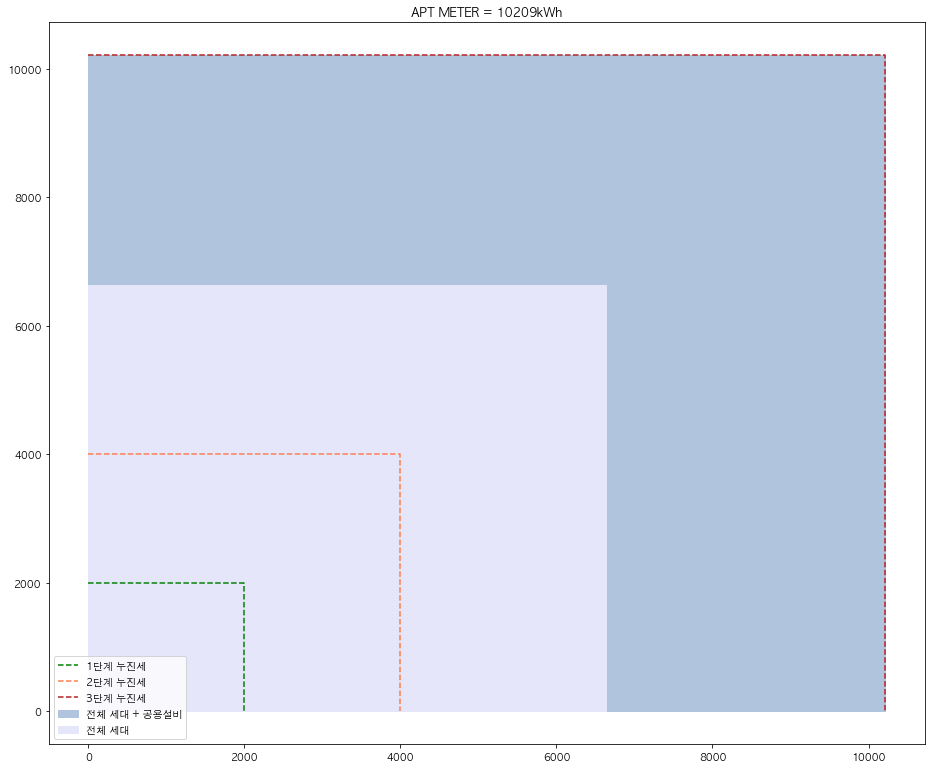

In [85]:
all_x = [0,ALL_RATE, ALL_RATE]
all_y = [ALL_RATE,ALL_RATE, 0]

household_x = [0, HOUSEHOLD_RATE, HOUSEHOLD_RATE]
household_y = [HOUSEHOLD_RATE, HOUSEHOLD_RATE, 0]

one_progressive_tax_x = [0, 200 * 10, 200 * 10]
one_progressive_tax_y = [200 * 10, 200 * 10, 0]

two_progressive_tax_x = [0, 400 * 10, 400 * 10]
two_progressive_tax_y = [400 * 10, 400 * 10, 0]

plt.fill_between(all_x, all_y, color='lightsteelblue', label="전체 세대 + 공용설비")
plt.fill_between(household_x, household_y, color='lavender', label="전체 세대")
plt.plot(one_progressive_tax_x, one_progressive_tax_y, color='green', linestyle='--',label="1단계 누진세")
plt.plot(two_progressive_tax_x, two_progressive_tax_y, color='coral', linestyle='--',label="2단계 누진세")
plt.plot(all_x, all_y, color='firebrick', linestyle='--',label="3단계 누진세")
plt.legend()
plt.title("APT METER = {}kWh".format(ALL_RATE))
plt.show()

In [86]:
prevail_comp

,사용량 (kwh),기본요금,전력량요금,기후환경요금,연료비조정액,필수사용량보장공제,전기요금계,부가세,4사 5입,전력산업기반기금,전력산업기반기금 (절사),청구금액,청구금액 (절사),공동전기사용료,최종청구금액
301호,142.0,910.0,12538.0,752.0,-426.0,-4000.0,9774.0,977.4,977.0,361.638,360.0,11111.0,11110.0,44741,55851.0
401호,214.0,1600.0,20220.0,1134.0,-642.0,0.0,22312.0,2231.2,2231.0,825.544,820.0,25363.0,25360.0,44741,70101.0
901호,126.0,910.0,11125.0,667.0,-378.0,-4000.0,8324.0,832.4,832.0,307.988,300.0,9456.0,9450.0,44741,54191.0
1601호,200.0,910.0,17660.0,1060.0,-600.0,-4000.0,15030.0,1503.0,1503.0,556.110,550.0,17083.0,17080.0,44741,61821.0


In [87]:
prevail_single

,사용량 (kwh),기본요금,전력량요금,기후환경요금,연료비조정액,필수사용량보장공제,전기요금계,부가세,4사 5입,전력산업기반기금,전력산업기반기금 (절사),청구금액,청구금액 (절사),공동전기사용료,최종청구금액
101호,343.0,1260.0,35008.0,1817.0,-1029.0,0.0,37056.0,3705.6,3706.0,1371.072,1370.0,42132.0,42130.0,50185,92315.0
201호,314.0,1260.0,30882.0,1664.0,-942.0,0.0,32864.0,3286.4,3286.0,1215.968,1210.0,37360.0,37360.0,50185,87545.0
501호,327.0,1260.0,32732.0,1733.0,-981.0,0.0,34744.0,3474.4,3474.0,1285.528,1280.0,39498.0,39490.0,50185,89675.0
601호,299.0,1260.0,28747.0,1584.0,-897.0,0.0,30694.0,3069.4,3069.0,1135.678,1130.0,34893.0,34890.0,50185,85075.0
701호,294.0,1260.0,28036.0,1558.0,-882.0,0.0,29972.0,2997.2,2997.0,1108.964,1100.0,34069.0,34060.0,50185,84245.0
801호,315.0,1260.0,31024.0,1669.0,-945.0,0.0,33008.0,3300.8,3301.0,1221.296,1220.0,37529.0,37520.0,50185,87705.0
1001호,257.0,1260.0,22771.0,1362.0,-771.0,0.0,24622.0,2462.2,2462.0,911.014,910.0,27994.0,27990.0,50185,78175.0
1101호,767.0,6060.0,120410.0,4065.0,-2301.0,0.0,128234.0,12823.4,12823.0,4744.658,4740.0,145797.0,145790.0,50185,195975.0
1201호,761.0,6060.0,119146.0,4033.0,-2283.0,0.0,126956.0,12695.6,12696.0,4697.372,4690.0,144342.0,144340.0,50185,194525.0
1301호,769.0,6060.0,120831.0,4075.0,-2307.0,0.0,128659.0,12865.9,12866.0,4760.383,4760.0,146285.0,146280.0,50185,196465.0


In [88]:
single_bill

,사용량 (kwh),기본요금,전력량요금,기후환경요금,연료비조정액,필수사용량보장공제,전기요금계,부가세,4사 5입,전력산업기반기금,전력산업기반기금 (절사),청구금액,청구금액 (절사),공동전기사용료,최종청구금액
101호,343.0,1260.0,35008.0,1817.0,-1029.0,0.0,37056.0,3705.6,3706.0,1371.072,1370.0,42132.0,42130.0,50185,92315.0
201호,314.0,1260.0,30882.0,1664.0,-942.0,0.0,32864.0,3286.4,3286.0,1215.968,1210.0,37360.0,37360.0,50185,87545.0
301호,142.0,730.0,10408.0,752.0,-426.0,-2500.0,8964.0,896.4,896.0,331.668,330.0,10190.0,10190.0,50185,60375.0
401호,214.0,1260.0,16652.0,1134.0,-642.0,0.0,18404.0,1840.4,1840.0,680.948,680.0,20924.0,20920.0,50185,71105.0
501호,327.0,1260.0,32732.0,1733.0,-981.0,0.0,34744.0,3474.4,3474.0,1285.528,1280.0,39498.0,39490.0,50185,89675.0
601호,299.0,1260.0,28747.0,1584.0,-897.0,0.0,30694.0,3069.4,3069.0,1135.678,1130.0,34893.0,34890.0,50185,85075.0
701호,294.0,1260.0,28036.0,1558.0,-882.0,0.0,29972.0,2997.2,2997.0,1108.964,1100.0,34069.0,34060.0,50185,84245.0
801호,315.0,1260.0,31024.0,1669.0,-945.0,0.0,33008.0,3300.8,3301.0,1221.296,1220.0,37529.0,37520.0,50185,87705.0
901호,126.0,730.0,9235.0,667.0,-378.0,-2500.0,7754.0,775.4,775.0,286.898,280.0,8809.0,8800.0,50185,58985.0
1001호,257.0,1260.0,22771.0,1362.0,-771.0,0.0,24622.0,2462.2,2462.0,911.014,910.0,27994.0,27990.0,50185,78175.0


In [89]:
# 주택용 전력 (고압) setting
household_high_pressure_fee = {
    "type": ["주택용 고압" for _ in range(0, 12)],
    "max kWh": reduce(lambda acc, cur: acc + [200, 400, float("inf")], range(0, 3), [])
    + [300, 450, float("inf")],
    "basic": reduce(lambda acc, cur: acc + [730, 1260, 6060], range(0, 4), []),
    "fee": reduce(lambda acc, cur: acc + [73.3, 142.3, 210.6], range(0, 4), []),
    "unit": ["kWh" for _ in range(0, 12)],
    "season": ["spring" for _ in range(0, 3)] + ["autumn" for _ in range(0, 3)] +
    ["winter" for _ in range(0, 3)] + ["summer" for _ in range(0, 3)]
}
household_high_pressure_fee_df = pd.DataFrame(household_high_pressure_fee,
                                              columns=['type', 'max kWh', 'basic', 'fee', 'unit', 'season'])
household_high_pressure_fee_df

,type,max kWh,basic,fee,unit,season
0,주택용 고압,200.0,730,73.3,kWh,spring
1,주택용 고압,400.0,1260,142.3,kWh,spring
2,주택용 고압,inf,6060,210.6,kWh,spring
3,주택용 고압,200.0,730,73.3,kWh,autumn
4,주택용 고압,400.0,1260,142.3,kWh,autumn
5,주택용 고압,inf,6060,210.6,kWh,autumn
6,주택용 고압,200.0,730,73.3,kWh,winter
7,주택용 고압,400.0,1260,142.3,kWh,winter
8,주택용 고압,inf,6060,210.6,kWh,winter
9,주택용 고압,300.0,730,73.3,kWh,summer


In [90]:
ALL_RATE / len(households_kwh)

638.0625

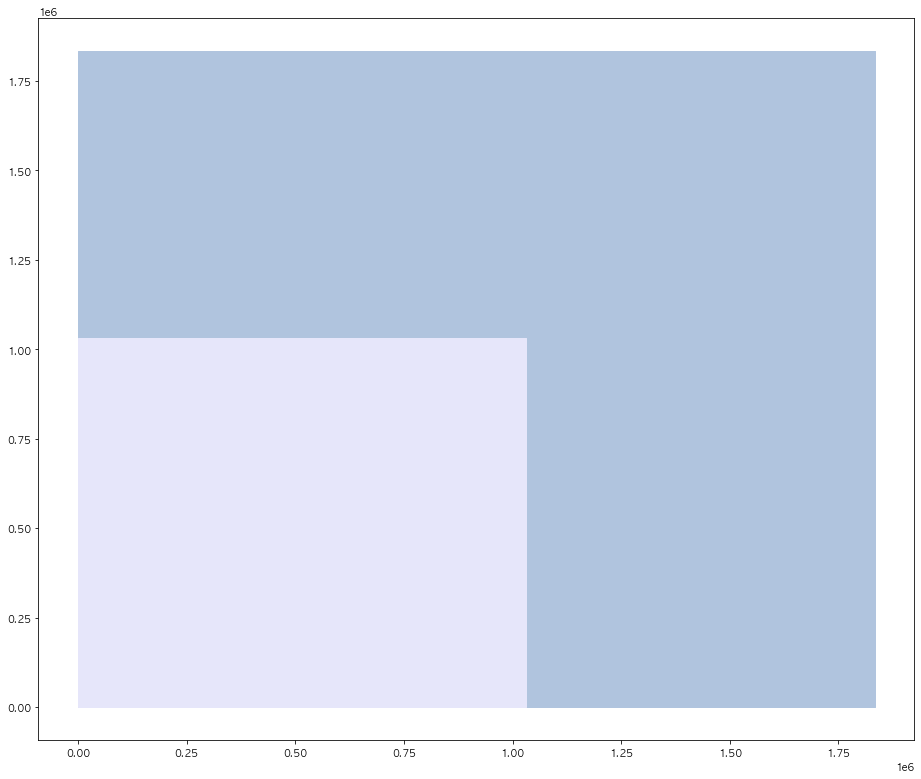

In [91]:
all_bill_x = [0, 
              single_bill.loc['[{}월] 관리사무소 청구서'.format(now_month)]['청구금액 (절사)'],
             single_bill.loc['[{}월] 관리사무소 청구서'.format(now_month)]['청구금액 (절사)']]
all_bill_y = [single_bill.loc['[{}월] 관리사무소 청구서'.format(now_month)]['청구금액 (절사)'],
             single_bill.loc['[{}월] 관리사무소 청구서'.format(now_month)]['청구금액 (절사)'],
             0]

household_bill_x = [0,
                   single_bill.loc['[{}월] 세대 전체 요금 합산'.format(now_month)]['청구금액 (절사)'],
                    single_bill.loc['[{}월] 세대 전체 요금 합산'.format(now_month)]['청구금액 (절사)']
                   ]
household_bill_y = [single_bill.loc['[{}월] 세대 전체 요금 합산'.format(now_month)]['청구금액 (절사)'],
                    single_bill.loc['[{}월] 세대 전체 요금 합산'.format(now_month)]['청구금액 (절사)'],
                   0]


plt.fill_between(all_bill_x, all_bill_y, color='lightsteelblue', label="전체 세대 + 공용설비")
plt.fill_between(household_bill_x, household_bill_y, color='lavender', label="전체 세대")

plt.show()